# Data processing using python - the basics
## Use case: Processing and Visualizing Covid-19 data


## Start by fetching the data
John Hopkins's university makes data available at: https://github.com/CSSEGISandData/COVID-19


There ways to access the data: 
1. using github
* Download git from: https://git-scm.com/downloads 
* Clone the git repository from a git command prompt / git bash: `git clone https://github.com/CSSEGISandData/COVID-19.git`
2. using web downloading
* use the URL open the webpage of the github repository 
* use the drop down option of "code" and select download zip to download the whole repository 
3. using the url link of the csv file directly from your code, (recommended) 
* right click on the file directly on the Github Reposistory and choose "copy link address" 
* paste into the code, see below 


## Install necessary libraries
`pip install pandas`

## First thing to do is always import the libraries
### [``numpy``](http://numpy.org/): Numerical Python

    * This library provides the ``ndarray`` for efficient storage and manipulation of dense data arrays in Python.
### [``pandas``](http://pandas.pydata.org/): Panel Data

    * This library provides the ``DataFrame`` for efficient storage and manipulation of labeled/columnar data in Python. 


In [1]:
import pandas as pd
import numpy as np

## Read data from the csv files from github

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#recovered_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print(confirmed_df.head()) #which create a new dataframe by containing the frist 5 rows of the original dataframe, and it will also show on the screen  the first 10 and last 10 collumns for the first 5 rows, 


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/1/22  10/2/22  10/3/22  \
0        0        0        0        0  ...   199310   199386   199545   
1        0        0        0        0  ...   332263   332285   332290   
2        0        0        0        0  ...   270676   270679   270682   
3        0        0        0        0  ...    46227    46227    46227   
4        0        0        0        0  ...   103131   103131   103131   

   10/4/22  10/5/22  10/6/22  10/7/22  10/8/22  10/9/22  10/10/22  
0   199690   199845   199994   200130   200202  

## Data processing before visualization
Goal: to visualize the pandemic trend changes through time for each country 

The data made available is in a format that isn't adequate for visualization:

1. It is split in multiple files  confirmed_df, deaths_df, and recovered_df
2. Only shows the sum up number
3. Dates are appended as separate columns rather than additional lines of data which doesn't work with standard plotting techniques
4. Data types aren't set on all values (dates stored as string)
5. Some values are set to `NaN`
6. Cruise ships data is reported slightly differently

In [3]:
dates = confirmed_df.columns[4:] #dataframe.columns grab all the labels of the columns 
dates  # The length matches the total days of the pandemic

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/1/22', '10/2/22', '10/3/22', '10/4/22', '10/5/22', '10/6/22',
       '10/7/22', '10/8/22', '10/9/22', '10/10/22'],
      dtype='object', length=993)

### We need to change all the columns into rows---Unpivot, convert columns into rows

In [4]:
# Using Google to learn new function

confirmed_df_long = confirmed_df.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],  # 
    value_vars = dates, 
    var_name = 'Date', # the label of the new column
    value_name = 'Confirmed'
)


deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

print(confirmed_df)  # 289 countries and it has been (992-4) after the pandemic broke out
print(confirmed_df_long)  # After we did this unpivot, for each country or region, 988 days* country numbers

    Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/1/22  10/2/22  \
0          0

In [11]:
# Removing Canada data as it's reported in a way that would require further processing
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, # in the right side of the confirmed datatable
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']  # merge them when these indexes are the same
)

# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [12]:
full_table['Date'] = pd.to_datetime(full_table['Date'])  # Because the type of Column 'Date' is string, use to_datetime to change it. 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [13]:
# Problem: we have a lot of NaN values
full_table.isna().sum()  # for example, there are 195624 Nan of column Province/State, and there is 0 Nan of Column Confirmed
# 0 is considered as a value instead of Nan

Province/State    196614
Country/Region         0
Lat                 1986
Long                1986
Date                   0
Confirmed              0
Deaths                 0
Recovered          20853
dtype: int64

In [14]:
# It's ok when it comes to province/state
# But not ok for recovered or deaths values. Assume that recovered is 0 when not set
full_table['Recovered'] = full_table['Recovered'].fillna(0)  # fill the 'Recovered' column with 0 when there is an Nan, but this is a bad code
full_table['Deaths'] = full_table['Deaths'].fillna(0)
full_table.isna().sum()

Province/State    196614
Country/Region         0
Lat                 1986
Long                1986
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [15]:
# Some cruise ships were also impacted. Ignoring them (drop the rows)
ship_rows = full_table['Province/State'].str.contains('Grand Princess')      \
            | full_table['Province/State'].str.contains('Diamond Princess')  \
            | full_table['Country/Region'].str.contains('Diamond Princess')  \
            | full_table['Country/Region'].str.contains('MS Zaandam')
#full_ship = full_table[ship_rows]
#print(full_ship.shape)
full_table = full_table[~(ship_rows)]

In [16]:
# Let's start doing some interesting data manipulation
# We can calculate active cases
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
286972,NaN,West Bank and Gaza,31.952200,35.233200,2022-10-10,702804,5707,0.0,697097.0
286973,NaN,Winter Olympics 2022,39.904200,116.407400,2022-10-10,535,0,0.0,535.0
286974,NaN,Yemen,15.552727,48.516388,2022-10-10,11939,2158,0.0,9781.0
286975,NaN,Zambia,-13.133897,27.849332,2022-10-10,333624,4017,0.0,329607.0
286976,NaN,Zimbabwe,-19.015438,29.154857,2022-10-10,257749,5604,0.0,252145.0


In [17]:
# We don't really care about per-region data
# Let's aggregate by country using the groupby function
# We specify that we want to keep Date and Country/Region as indices
# Then we apply the sum() aggregate to the Confirmed, Deaths, Recovered and Active columns 
#       for unique values of (Date,Country/Region)
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(full_grouped.head())
print(full_grouped.tail())

        Date Country/Region  Confirmed  Deaths  Recovered  Active
0 2020-01-22    Afghanistan          0       0        0.0     0.0
1 2020-01-22        Albania          0       0        0.0     0.0
2 2020-01-22        Algeria          0       0        0.0     0.0
3 2020-01-22        Andorra          0       0        0.0     0.0
4 2020-01-22         Angola          0       0        0.0     0.0
             Date        Country/Region  Confirmed  Deaths  Recovered  \
197602 2022-10-10    West Bank and Gaza     702804    5707        0.0   
197603 2022-10-10  Winter Olympics 2022        535       0        0.0   
197604 2022-10-10                 Yemen      11939    2158        0.0   
197605 2022-10-10                Zambia     333624    4017        0.0   
197606 2022-10-10              Zimbabwe     257749    5604        0.0   

          Active  
197602  697097.0  
197603     535.0  
197604    9781.0  
197605  329607.0  
197606  252145.0  


/tmp/ipykernel_53/231230715.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


In [18]:
# Now we can calculate new cases, new deaths and new recovered by deducting
# the data on the pevious day.

temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()  # diff(): self learning
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)  # when you shift one of your table, the Country/Region changes
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

/tmp/ipykernel_53/2560812811.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [19]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
197602,2022-10-10,West Bank and Gaza,702804,5707,0.0,697097.0,0,0,0
197603,2022-10-10,Winter Olympics 2022,535,0,0.0,535.0,0,0,0
197604,2022-10-10,Yemen,11939,2158,0.0,9781.0,0,0,0
197605,2022-10-10,Zambia,333624,4017,0.0,329607.0,69,0,0


In [20]:
# You can save this to a csv file
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

In [21]:
pwd  # jovyan means user for Jupyter notebook

'/home/jovyan/Week3'

# Let's try to visualize that data


In [17]:
unitedKingdomdf = full_grouped.loc[full_grouped['Country/Region'] =='United Kingdom']
unitedKingdomdf.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
188,2020-01-22,United Kingdom,0,0,0.0,0.0
387,2020-01-23,United Kingdom,0,0,0.0,0.0
586,2020-01-24,United Kingdom,0,0,0.0,0.0
785,2020-01-25,United Kingdom,0,0,0.0,0.0
984,2020-01-26,United Kingdom,0,0,0.0,0.0


In [22]:
francedf = full_grouped.loc[full_grouped['Country/Region'] =='France']
francedf.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
62,2020-01-22,France,0,0,0.0,0.0,0,0,0
261,2020-01-23,France,0,0,0.0,0.0,0,0,0
460,2020-01-24,France,2,0,0.0,2.0,2,0,0
659,2020-01-25,France,3,0,0.0,3.0,1,0,0
858,2020-01-26,France,3,0,0.0,3.0,0,0,0


In [23]:
usdf = full_grouped.loc[full_grouped['Country/Region'] =='US']
usdf.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
184,2020-01-22,US,1,0,0.0,1.0,0,0,0
383,2020-01-23,US,1,0,0.0,1.0,0,0,0
582,2020-01-24,US,2,0,0.0,2.0,1,0,0
781,2020-01-25,US,2,0,0.0,2.0,0,0,0
980,2020-01-26,US,5,0,0.0,5.0,3,0,0


### Imported library for visualizaton 
you should always imported package, library, modules at the beginning of notebook for best practice of notebook writing, but since this is section added later, we will import library for plotting here. 

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
FrancePopulation = 67060000
UKPopulation = 66650000
USPopulation = 328200000

NameError: name 'unitedKingdomdf' is not defined

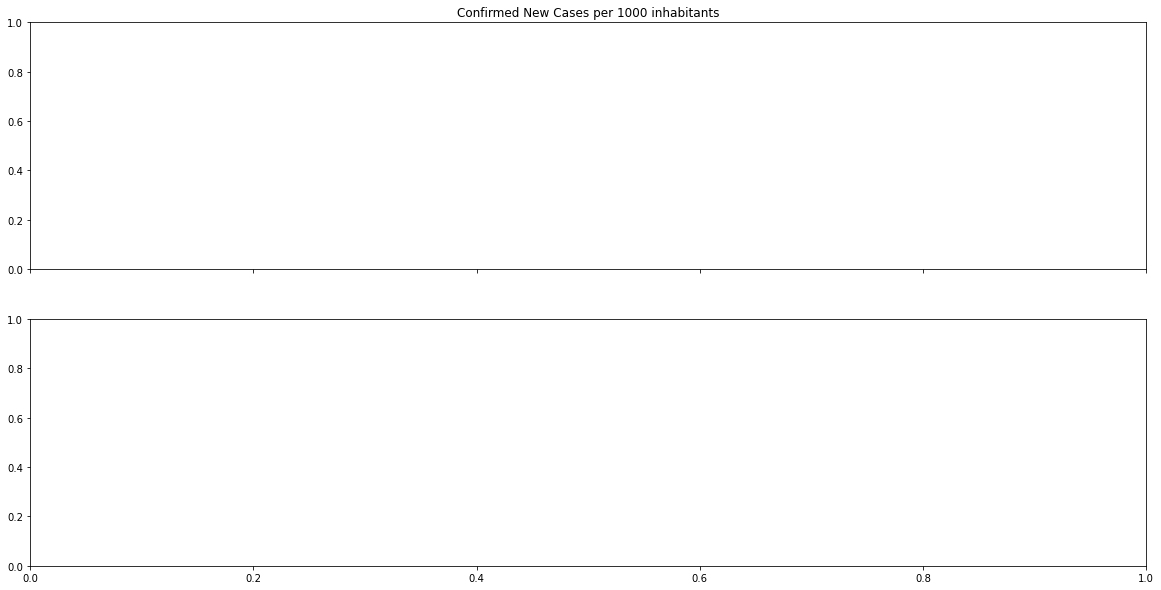

In [26]:
fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=1, sharex=True)  # sharex=True, it means that this two plots shared the same x axis

ax[0].title.set_text('Confirmed New Cases per 1000 inhabitants')  # ax is the name of the plot, 0 means the first subplot
ax[0].plot(unitedKingdomdf['Date'],unitedKingdomdf['New cases']/UKPopulation*1000, color='blue', label="UK")
ax[0].plot(francedf['Date'],francedf['New cases']/FrancePopulation*1000, color='red', label="France")
ax[0].plot(usdf['Date'],usdf['New cases']/USPopulation*1000, color='grey', label="US")
ax[0].legend()

ax[1].title.set_text('Deaths per 1000 inhabitants')
ax[1].plot(unitedKingdomdf['Date'],unitedKingdomdf['New deaths']/UKPopulation*1000, color='blue', label="UK")
ax[1].plot(francedf['Date'],francedf['New deaths']/FrancePopulation*1000, color='red', label="France")
ax[1].plot(usdf['Date'],usdf['New deaths']/USPopulation*1000, color='grey', label="US")
ax[1].legend()